In [1]:
RAW_DATA_PATH = 'data/employee_reviews.csv'

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [4]:
raw_data_df = pd.read_csv(RAW_DATA_PATH, engine='python', encoding='utf-8', index_col=0)

In [5]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67529 entries, 1 to 67529
Data columns (total 16 columns):
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 8.8+

In [6]:
raw_data_df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [7]:
# remove duplicate
raw_data_df = raw_data_df.drop_duplicates()
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67529 entries, 1 to 67529
Data columns (total 16 columns):
company                       67529 non-null object
location                      67529 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67409 non-null object
pros                          67529 non-null object
cons                          67529 non-null object
advice-to-mgmt                67232 non-null object
overall-ratings               67529 non-null float64
work-balance-stars            67529 non-null object
culture-values-stars          67529 non-null object
carrer-opportunities-stars    67529 non-null object
comp-benefit-stars            67529 non-null object
senior-mangemnet-stars        67529 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 8.8+

In [8]:
# remove none
raw_data_df = raw_data_df.dropna()
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67122 entries, 1 to 67529
Data columns (total 16 columns):
company                       67122 non-null object
location                      67122 non-null object
dates                         67122 non-null object
job-title                     67122 non-null object
summary                       67122 non-null object
pros                          67122 non-null object
cons                          67122 non-null object
advice-to-mgmt                67122 non-null object
overall-ratings               67122 non-null float64
work-balance-stars            67122 non-null object
culture-values-stars          67122 non-null object
carrer-opportunities-stars    67122 non-null object
comp-benefit-stars            67122 non-null object
senior-mangemnet-stars        67122 non-null object
helpful-count                 67122 non-null int64
link                          67122 non-null object
dtypes: float64(1), int64(1), object(14)
memory usage: 8.7+

In [9]:
raw_data_df['year'] = pd.to_datetime(raw_data_df['dates'], errors='coerce').dt.year

In [10]:
# company analysis
comp_counter = Counter()
comp_counter.update(raw_data_df['company'])
print(len(comp_counter))
print(comp_counter.most_common())

6
[('amazon', 26283), ('microsoft', 17830), ('apple', 12858), ('google', 7775), ('facebook', 1578), ('netflix', 798)]


In [11]:
# sns.set(style="darkgrid")
# fig, ax = plt.subplots(dpi=150)
# ax = sns.countplot(x="company", data=raw_data_df)
# ax.set(xlabel='Company', ylabel='Frequency')
# plt.show()

In [12]:
# # Review Number per Year
# year_df = raw_data_df['year'].value_counts().sort_index(ascending=True)
# year_label = year_df.index.tolist()
# year_index = np.arange(len(year_label))

# plt.figure(figsize=(12, 9), dpi=100)
# sns.barplot(year_index, year_df, palette='rocket')
# plt.xticks(year_index, year_label)
# plt.xlabel("Year")
# plt.ylabel("Number of Reviews")
# plt.title("Reviews per Year")
# plt.savefig("Distribution of Reviews per Year.png", dpi=100)

In [13]:
# # Revirw Number per Year per Company
# fig, axs = plt.subplots(3,2, figsize=(16, 12), dpi=100)
# companies = [['google', 'amazon'], ['facebook', 'netflix'], ['apple', 'microsoft']]

# for i in range(3):
#     for j in range(2):
    
#         company = companies[i][j]
#         years_count = raw_data_df[raw_data_df['company'] == company]['year'].value_counts().sort_index(ascending=True)
#         years_labels = years_count.index.tolist()
#         years_index = np.arange(len(years_labels))

#         g = sns.barplot(years_index, years_count, tick_label = years_labels, ax=axs[i][j], palette='rocket')
#         g.set(xticklabels=years_labels)
#         _ = axs[i][j].set_xlabel("Year")
#         _ = axs[i][j].set_ylabel("Number of Reviews")
#         _ = axs[i][j].set_title("{}: Reviews per Year".format(company.title()))
    
# fig.tight_layout()
# fig.savefig("Distribution of Reviews per Year per Company.png", dpi=100)

In [14]:
# word cloud with before preprocessing
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# word_content = ' '.join(raw_data_df['summary'] + raw_data_df['pros'] + raw_data_df['cons'])
# wc = WordCloud(margin=5, random_state=1, width=800, height=400).generate(word_content)
# plt.figure(figsize=(20, 10), dpi=100)
# plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [15]:
# starts analysis
starts_df = pd.concat([
    raw_data_df['company'], 
    raw_data_df['overall-ratings'], 
    raw_data_df['work-balance-stars'], 
    raw_data_df['culture-values-stars'], 
    raw_data_df['carrer-opportunities-stars'], 
    raw_data_df['comp-benefit-stars'], 
    raw_data_df['senior-mangemnet-stars']], axis=1)

In [16]:
google_starts_df = starts_df.loc[starts_df['company'] == 'google']
amazon_starts_df = starts_df.loc[starts_df['company'] == 'amazon']
fb_starts_df = starts_df.loc[starts_df['company'] == 'facebook']
netflix_starts_df = starts_df.loc[starts_df['company'] == 'netflix']
apple_starts_df = starts_df.loc[starts_df['company'] == 'apple']
ms_starts_df = starts_df.loc[starts_df['company'] == 'microsoft']

def fill_na_to_mean(raw_data_df):
    for col_name in raw_data_df.columns[1:]:
        raw_list = raw_data_df[col_name].to_list()
        mean = np.mean([float(value) for value in raw_list if value != 'none'])
        fillna_value_list = []
        for i in range(len(raw_list)):
            if raw_list[i] == 'none':
                fillna_value_list.append(mean)
            else:
                fillna_value_list.append(float(raw_list[i]))
        raw_data_df[col_name] = fillna_value_list
    return raw_data_df

google_starts_df = fill_na_to_mean(google_starts_df)
amazon_starts_df = fill_na_to_mean(amazon_starts_df)
fb_starts_df = fill_na_to_mean(fb_starts_df)
netflix_starts_df = fill_na_to_mean(netflix_starts_df)
apple_starts_df = fill_na_to_mean(apple_starts_df)
ms_starts_df = fill_na_to_mean(ms_starts_df)

C:\Users\himad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
google_starts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7775 entries, 1 to 7819
Data columns (total 7 columns):
company                       7775 non-null object
overall-ratings               7775 non-null float64
work-balance-stars            7775 non-null float64
culture-values-stars          7775 non-null float64
carrer-opportunities-stars    7775 non-null float64
comp-benefit-stars            7775 non-null float64
senior-mangemnet-stars        7775 non-null float64
dtypes: float64(6), object(1)
memory usage: 485.9+ KB


In [18]:
overall_ratings_list = [google_starts_df['overall-ratings'].mean(), 
                       amazon_starts_df['overall-ratings'].mean(), 
                       fb_starts_df['overall-ratings'].mean(), 
                       netflix_starts_df['overall-ratings'].mean(), 
                       apple_starts_df['overall-ratings'].mean(), 
                       ms_starts_df['overall-ratings'].mean()]

work_balance_stars_list = [google_starts_df['work-balance-stars'].mean(), 
                       amazon_starts_df['work-balance-stars'].mean(), 
                       fb_starts_df['work-balance-stars'].mean(), 
                       netflix_starts_df['work-balance-stars'].mean(), 
                       apple_starts_df['work-balance-stars'].mean(), 
                       ms_starts_df['work-balance-stars'].mean()]

culture_values_stars_list = [google_starts_df['culture-values-stars'].mean(), 
                       amazon_starts_df['culture-values-stars'].mean(), 
                       fb_starts_df['culture-values-stars'].mean(), 
                       netflix_starts_df['culture-values-stars'].mean(), 
                       apple_starts_df['culture-values-stars'].mean(), 
                       ms_starts_df['culture-values-stars'].mean()]

carrer_opportunities_stars_list = [google_starts_df['carrer-opportunities-stars'].mean(), 
                       amazon_starts_df['carrer-opportunities-stars'].mean(), 
                       fb_starts_df['carrer-opportunities-stars'].mean(), 
                       netflix_starts_df['carrer-opportunities-stars'].mean(), 
                       apple_starts_df['carrer-opportunities-stars'].mean(), 
                       ms_starts_df['carrer-opportunities-stars'].mean()]

comp_benefit_stars_list = [google_starts_df['comp-benefit-stars'].mean(), 
                       amazon_starts_df['comp-benefit-stars'].mean(), 
                       fb_starts_df['comp-benefit-stars'].mean(), 
                       netflix_starts_df['comp-benefit-stars'].mean(), 
                       apple_starts_df['comp-benefit-stars'].mean(), 
                       ms_starts_df['comp-benefit-stars'].mean()]

senior_mangemnet_stars = [google_starts_df['senior-mangemnet-stars'].mean(), 
                       amazon_starts_df['senior-mangemnet-stars'].mean(), 
                       fb_starts_df['senior-mangemnet-stars'].mean(), 
                       netflix_starts_df['senior-mangemnet-stars'].mean(), 
                       apple_starts_df['senior-mangemnet-stars'].mean(), 
                       ms_starts_df['senior-mangemnet-stars'].mean()]

In [19]:
# plt.subplots(figsize = (16, 4), dpi=100)
# plt.plot(
#     np.arange(len(overall_ratings_list)), 
#     overall_ratings_list, 
#     marker='o', 
#     markerfacecolor='blue', 
#     markersize=12, 
#     color='skyblue', 
#     linewidth=4, 
#     label='overall')

# plt.plot(
#     np.arange(len(work_balance_stars_list)), 
#     work_balance_stars_list, 
#     marker='o', 
#     markerfacecolor='red', 
#     markersize=12, 
#     color='lightsalmon', 
#     linewidth=4, 
#     label='work balance')

# plt.plot(
#     np.arange(len(culture_values_stars_list)), 
#     culture_values_stars_list, 
#     marker='o', 
#     markerfacecolor='green', 
#     markersize=12, 
#     color='springgreen', 
#     linewidth=4, 
#     label='culture values')

# plt.plot(
#     np.arange(len(carrer_opportunities_stars_list)), 
#     carrer_opportunities_stars_list, 
#     marker='o', 
#     markerfacecolor='violet', 
#     markersize=12, 
#     color='purple', 
#     linewidth=4, 
#     label='carrer opportunities')

# plt.plot(
#     np.arange(len(comp_benefit_stars_list)), 
#     comp_benefit_stars_list, 
#     marker='o', 
#     markerfacecolor='gold', 
#     markersize=12, 
#     color='yellow', 
#     linewidth=4, 
#     label='comp benefit')

# plt.plot(
#     np.arange(len(senior_mangemnet_stars)), 
#     senior_mangemnet_stars, 
#     marker='o', 
#     markerfacecolor='pink', 
#     markersize=12, 
#     color='deeppink', 
#     linewidth=4, 
#     label='senior management')

# plt.xticks(np.arange(6), ('Google', 'Amazon', 'Facebook', 'Netflix', 'Apple', 'Microsoft'))
# plt.legend()
# plt.xlabel('Company')
# plt.ylabel('Score')
# plt.savefig('Overall Starts and Ratings Distribution.png', dpi=100)
# plt.show()

In [20]:
group = starts_df.groupby('company')['overall-ratings'].describe()
group = group.transpose()
group.columns = ['Amazon', 'Apple', 'Facebook', 'Google', 'Microsoft', 'Netflix']
group.round(2)

,Amazon,Apple,Facebook,Google,Microsoft,Netflix
count,26283.00,12858.00,1578.00,7775.00,17830.00,798.00
mean,3.59,3.96,4.51,4.34,3.82,3.41
std,1.26,1.06,0.95,0.92,1.04,1.42
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.00,3.00,4.00,4.00,3.00,2.00
50%,4.00,4.00,5.00,5.00,4.00,4.00
75%,5.00,5.00,5.00,5.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00


In [21]:
# Starts Distribution per Company

ratings_comp = starts_df[["company", "work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]]
ratings_comp.set_index(["company"], inplace=True)
ratings_comp = ratings_comp[~(ratings_comp[["work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] == "none").any(axis=1)]
ratings_comp[["work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]] = ratings_comp[["work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"]].apply(pd.to_numeric)
group = ratings_comp.groupby("company")["work-balance-stars", "culture-values-stars", "carrer-opportunities-stars", "comp-benefit-stars", "senior-mangemnet-stars"].mean()
group.columns = ["Work Balance", "Culture Values", "Career Opportunities", "Company Benefits", "Senior Management"]
group = group.transpose()
group.columns = ['Amazon', 'Apple', 'Facebook', 'Google', 'Microsoft', 'Netflix']
group.round(2)

,Amazon,Apple,Facebook,Google,Microsoft,Netflix
Work Balance,3.01,3.34,3.90,4.00,3.57,3.20
Culture Values,3.53,4.10,4.52,4.36,3.66,3.51
Career Opportunities,3.62,3.42,4.36,4.03,3.71,3.15
Company Benefits,3.71,4.06,4.57,4.43,4.02,4.25
Senior Management,3.17,3.45,4.26,3.87,3.18,3.18


In [22]:
# plt.figure(figsize=(14, 9), dpi=100)
# sns.heatmap(group, annot=True, fmt="f", cmap="YlGnBu")
# plt.savefig("Distribution of Starts per Company Heatmap.png", dpi=100)

In [23]:
# # # current vs. former
# fig, axs = plt.subplots(3,2, figsize=(12, 9), facecolor='w', edgecolor='k', dpi=100)
# companies = ['google', 'amazon', 'facebook', 'netflix', 'apple', 'microsoft']
# axs = axs.ravel()


# for i, company in enumerate(companies):
#     current_employee_count = raw_data_df.loc[raw_data_df['company'] == company]['job-title'].str.split('-', expand=True)[0].value_counts().sort_values(ascending=True)
#     employee_labels = current_employee_count.index.tolist()
#     employee_index = np.arange(len(employee_labels))
        
#     bars = axs[i].bar(employee_index, current_employee_count, tick_label=['Former Employee', 'Current Employee'])
#     bars[0].set_color('gray')
#     bars[1].set_color('b')
#     axs[i].set_xlabel('Types of Employee')
#     axs[i].set_ylabel('Number of Reviews')
#     axs[i].set_title('{}: Reviews (Former vs Current)'.format(company.title()))
    
# fig.tight_layout()
# # fig.savefig("Review Number per Employee Type per Company.png", dpi=100)


In [24]:
# fig, axs = plt.subplots(3,2, figsize=(12, 9), facecolor='w', edgecolor='k', dpi=100)
# companies = ['google', 'amazon', 'facebook', 'netflix', 'apple', 'microsoft']
# axs = axs.ravel()

# for i, company in enumerate(companies):
    
#         job_rating = raw_data_df[raw_data_df['company'] == company][['job-title', 'overall-ratings']]
#         job_rating['job-title'] = job_rating['job-title'].str.split(' - ', expand=True)[0]
#         job_rating_count = job_rating.groupby('job-title')['overall-ratings'].mean().sort_values(ascending=True)

#         bars = axs[i].bar([0,1], job_rating_count, tick_label = ['Current Employee', 'Former Employee'])
#         bars[0].set_color('gray')
#         bars[1].set_color('b')
#         axs[i].set_title('{}: Avg. Overall Rating (Current vs Former)'.format(company.title()))
#         axs[i].set_xlabel("Types of Employee")
#         axs[i].set_ylabel("Avg. Overall Rating")

# fig.tight_layout()
# fig.savefig("Overall Rating per Employee Type per Company.png", dpi=100)

# Word Analyze

In [25]:
stop_words = set(stopwords.words("english"))
stop_words = stop_words.union(raw_data_df["company"].unique())
print(len(stop_words))
print(stop_words)

185
{'mightn', 'them', 'had', 'but', 'been', 'at', 'while', 'now', 'amazon', 'that', 'have', 'off', 'do', 'so', 'same', 'mustn', 'between', 'because', 'down', 'myself', 'yourselves', "you'll", 'being', 'to', 'd', 'if', 've', 'against', 'just', "couldn't", 'own', 'any', 'y', 'be', 'from', 'won', 'm', 'facebook', 'before', 'shan', 'an', "shan't", 'such', 'yours', 'what', 'me', 'should', 'they', 'only', 'there', 'were', 'or', 'theirs', 'its', 'him', 'ourselves', 'are', 'has', 'did', 'why', 'does', 'for', 'out', 'then', 'more', 'during', 'than', 'was', 'other', 're', "wouldn't", 'over', 'once', 'itself', 'll', 'ours', 'below', 'doesn', 'isn', 'apple', 'no', 'having', 'further', 'hadn', "weren't", "you've", 'each', 'couldn', 'haven', "hadn't", "aren't", 'google', 'don', "should've", 'up', 'you', "needn't", 'we', 'those', 'through', "you'd", 'very', 'after', 'this', 'when', 'herself', 'too', "she's", 'your', 'by', "mightn't", 'about', 'themselves', "shouldn't", 'until', "it's", 'microsoft', 

In [26]:
def top_words(company, review_type, stop_words, top=20):
    
    corpus = raw_data_df[raw_data_df['company'] == company][review_type].str.lower()
    # Remove punctuations
    corpus = corpus.str.replace("[^a-zA-Z]", " ")
    # Convert to list from string
    corpus = corpus.str.split()
    # Remove stop words
    corpus = corpus.apply(lambda x: [word for word in x if word not in stop_words])

    # Lemmatisation
    lem = WordNetLemmatizer()
    def lemmatize_text(text):
        return [lem.lemmatize(word) for word in text]
    corpus = corpus.apply(lemmatize_text)
    corpus = corpus.apply(pd.Series).stack()
    return set(corpus.value_counts()[:top].index.tolist())

In [27]:
amazon_pros = top_words("amazon", "pros", stop_words)
apple_pros = top_words("apple", "pros", stop_words)
facebook_pros = top_words('facebook', 'pros', stop_words)
google_pros = top_words("google", "pros", stop_words)
micro_pros = top_words("microsoft", "pros", stop_words)
netflix_pros = top_words('netflix', 'pros', stop_words)

company_common_pros = set.intersection(amazon_pros, apple_pros, facebook_pros, google_pros, micro_pros, netflix_pros)
company_common_pros

{'benefit', 'company', 'culture', 'good', 'great', 'lot', 'people', 'work'}

In [28]:
amazon_cons = top_words("amazon", "cons", stop_words)
apple_cons = top_words("apple", "cons", stop_words)
facebook_cons = top_words('facebook', 'cons', stop_words)
google_cons = top_words("google", "cons", stop_words)
micro_cons = top_words("microsoft", "cons", stop_words)
netflix_cons = top_words('netflix', 'cons', stop_words)

company_common_cons = set.intersection(amazon_cons, apple_cons, facebook_cons, google_cons, micro_cons, netflix_cons)
company_common_cons

{'company', 'get', 'like', 'management', 'manager', 'people', 'time', 'work'}

In [29]:
pd.options.display.max_rows = 4000
cons_common = pd.Series(' '.join(raw_data_df['cons'].str.lower()).split()).value_counts()[:70]
cons_except = {"hours", "hard", "time", "life"}
cons_stop = set(cons_common.index.tolist())
cons_stop = cons_stop - set(cons_except)
cons_stop = cons_stop.union(company_common_cons)

In [30]:
pros_common = pd.Series(' '.join(raw_data_df['pros'].str.lower()).split()).value_counts()[:70]
pros_except = {"culture", "learn", "smart", "opportunities", 
               "environment", "amazing", "team", "flexible", "opportunity"}
pros_stop = set(pros_common.index.tolist())
pros_stop = pros_stop - set(pros_except)
pros_stop = pros_stop.union(company_common_pros)

In [31]:
def create_cloud(company, review_type, new_stop):
    # Convert to lowercase
    corpus = raw_data_df[raw_data_df['company'] == company][review_type].str.lower()
    # Remove punctuations
    corpus = corpus.str.replace("[^a-zA-Z]", " ")
    # Convert to list from string
    corpus = corpus.str.split()
    # Remove stop words
    new_stop = stop_words.union(new_stop)
    corpus = corpus.apply(lambda x: [word for word in x if word not in new_stop])
    # Lemmatisation
    lem = WordNetLemmatizer()
    def lemmatize_text(text):
        return [lem.lemmatize(word) for word in text]
    corpus = corpus.apply(lemmatize_text)
    corpus = corpus.str.join(" ")
    
    return WordCloud(margin=5, random_state=1, width=800, height=400).generate(" ".join(corpus))

In [32]:
# for i, company in enumerate(raw_data_df["company"].unique()):
#     wc = create_cloud(company, "cons", cons_stop)
#     fig = plt.figure(figsize=(18, 9), dpi=100)
#     plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
#     plt.title("{} Cons Word Cloud".format(company.title()), fontsize=20)
#     plt.axis('off')
#     fig.savefig("{} Cons Word Cloud.png".format(company), dpi=100)

In [33]:
# for i, company in enumerate(raw_data_df["company"].unique()):
#     wc = create_cloud(company, "pros", pros_stop)
#     fig = plt.figure(figsize=(18, 9), dpi=100)
#     plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
#     plt.title("{} Pros Word Cloud".format(company.title()), fontsize=20)
#     plt.axis('off')
#     fig.savefig("{} Pros Word Cloud.png".format(company), dpi=100)

# Modeling

In [34]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

In [35]:
def clean_corpus(pd_col):
    pd_col = pd_col.str.lower()
    pd_col = pd_col.str.replace("[^a-zA-Z]", " ")
    pd_col = pd_col.str.split()
    pd_col = pd_col.apply(lambda x: [word for word in x if word not in stop_words])
    lem = WordNetLemmatizer()
    def lemmatize_text(text):
        return [lem.lemmatize(word) for word in text]
    pd_col = pd_col.apply(lemmatize_text)
    return pd_col

In [36]:
raw_sum_col = raw_data_df['summary']
raw_pros_col = raw_data_df['pros']
raw_cons_col = raw_data_df['cons']

raw_sum_col = clean_corpus(raw_sum_col)
raw_pros_col = clean_corpus(raw_pros_col)
raw_cons_col = clean_corpus(raw_cons_col)

In [37]:
raw_x = []
raw_sum_list = raw_sum_col.to_list()
raw_pros_list = raw_pros_col.to_list()
raw_cons_list = raw_cons_col.to_list()
for i in range(len(raw_data_df)):
    raw_x.append(' '.join(raw_sum_list[i]) + ' ' + ' '.join(raw_pros_list[i]) + ' ' + ' '.join(raw_cons_list[i]))
#     raw_x.append(' '.join(raw_sum_list[i]))

In [38]:
raw_y = raw_data_df['overall-ratings'].to_list()

In [39]:
raw_binary_y = []
for i in range(len(raw_y)):
    if raw_y[i] >= 3:
        raw_binary_y += [1]
    else:
        raw_binary_y += [0]

In [40]:
# majority vote
len([y for y in raw_binary_y if y == 1])/len(raw_binary_y)

0.8636810583713238

In [41]:
# train_x, valid_x, train_y, valid_y = train_test_split(raw_x, raw_y, test_size=0.1, random_state=0)

In [42]:
# token_counter = Counter()
# for seq in raw_x:
#     token_counter.update(seq.split())

# print(len(token_counter))
# print(token_counter.most_common())

In [43]:
#  unigram term frequency vectorizer, set minimum document frequency to 5
gram1_count_vectorizer = CountVectorizer(encoding='latin-1',
                                         min_df = 5, 
                                         binary=False,  
                                         stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', 
                                          min_df = 5,
                                          ngram_range=(1,2), 
                                          binary = False, 
                                          stop_words='english')

tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', 
                                   min_df = 5, 
                                   ngram_range=(1,2), 
                                   binary = False, 
                                   stop_words='english')

In [44]:
train_x_1gram_vec = gram1_count_vectorizer.fit_transform(raw_x)
train_x_12gram_vec = gram12_count_vectorizer.fit_transform(raw_x)
train_x_tfidf_vec = tfidf_vectorizer.fit_transform(raw_x)

In [45]:
# train_x_1gram_vec = gram1_count_vectorizer.fit_transform(train_x)
# train_x_12gram_vec = gram12_count_vectorizer.fit_transform(train_x)
# train_x_tfidt_vec = tfidf_vectorizer.fit_transform(train_x)

In [46]:
# valid_x_1gram_vec = gram1_count_vectorizer.transform(valid_x)
# valid_x_12gram_vec = gram12_count_vectorizer.transform(valid_x)
# valid_x_tfidt_vec = tfidf_vectorizer.transform(valid_x)

In [47]:
nb = MultinomialNB()

In [48]:
# %time nb.fit(train_x_1gram_vec, train_y)
# valid_pred_y = nb.predict(valid_x_1gram_vec)
# print(metrics.classification_report(valid_y, valid_pred_y))
# print('accuracy ', np.mean(valid_pred_y == valid_y))

In [49]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25)
nb_1gram_cv_scores = cross_val_score(nb, train_x_1gram_vec, raw_binary_y, cv=cv)
mean, std = nb_1gram_cv_scores.mean(), nb_1gram_cv_scores.std()
print(f"Mean cross-validation score: {mean:.3f} (+/- {std:.3f})")

Mean cross-validation score: 0.874 (+/- 0.002)


In [50]:
nb_12gram_cv_scores = cross_val_score(nb, train_x_12gram_vec, raw_binary_y, cv=cv)
mean, std = nb_12gram_cv_scores.mean(), nb_12gram_cv_scores.std()
print(f"Mean cross-validation score: {mean:.3f} (+/- {std:.3f})")

Mean cross-validation score: 0.863 (+/- 0.002)


In [51]:
nb_tfidf_cv_scores = cross_val_score(nb, train_x_tfidf_vec, raw_binary_y, cv=cv)
mean, std = nb_tfidf_cv_scores.mean(), nb_tfidf_cv_scores.std()
print(f"Mean cross-validation score: {mean:.3f} (+/- {std:.3f})")

Mean cross-validation score: 0.873 (+/- 0.001)


In [52]:
svm = SGDClassifier()
svm_1gram_cv_scores = cross_val_score(svm, train_x_1gram_vec, raw_binary_y, cv=cv)
mean, std = svm_1gram_cv_scores.mean(), svm_1gram_cv_scores.std()
print(f"Mean cross-validation score: {mean:.3f} (+/- {std:.3f})")

C:\Users\himad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Mean cross-validation score: 0.884 (+/- 0.006)


In [53]:
svm_12gram_cv_scores = cross_val_score(svm, train_x_12gram_vec, raw_binary_y, cv=cv)
mean, std = svm_12gram_cv_scores.mean(), svm_12gram_cv_scores.std()
print(f"Mean cross-validation score: {mean:.3f} (+/- {std:.3f})")

C:\Users\himad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Mean cross-validation score: 0.884 (+/- 0.005)


In [54]:
svm_tfidf_cv_scores = cross_val_score(svm, train_x_tfidf_vec, raw_binary_y, cv=cv)
mean, std = svm_tfidf_cv_scores.mean(), svm_tfidf_cv_scores.std()
print(f"Mean cross-validation score: {mean:.3f} (+/- {std:.3f})")

C:\Users\himad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Mean cross-validation score: 0.880 (+/- 0.001)


In [55]:
base_line = np.array([0.8636810583713238] * 10)

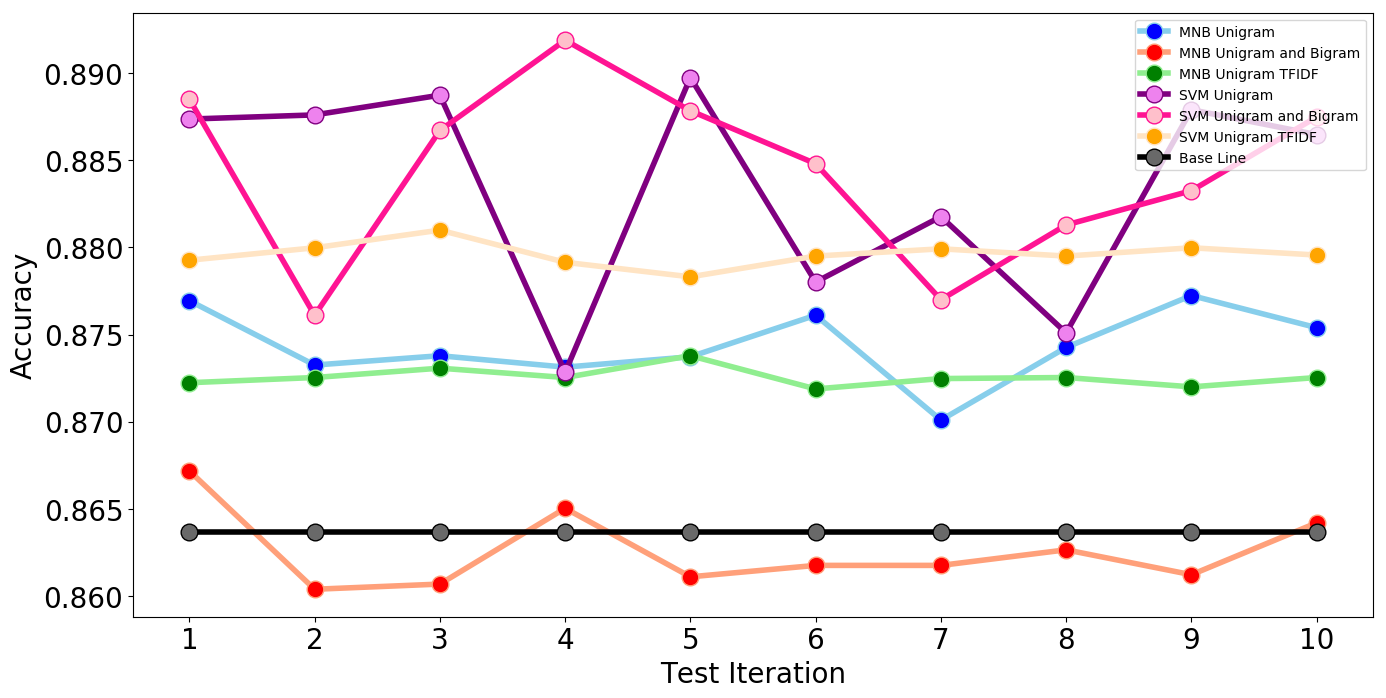

In [56]:
plt.subplots(figsize = (16, 8), dpi=100)
plt.plot(
    np.arange(len(nb_1gram_cv_scores)), 
    nb_1gram_cv_scores, 
    marker='o', 
    markerfacecolor='blue', 
    markersize=12, 
    color='skyblue', 
    linewidth=4, 
    label='MNB Unigram')

plt.plot(
    np.arange(len(nb_12gram_cv_scores)), 
    nb_12gram_cv_scores, 
    marker='o', 
    markerfacecolor='red', 
    markersize=12, 
    color='lightsalmon', 
    linewidth=4, 
    label='MNB Unigram and Bigram')

plt.plot(
    np.arange(len(nb_tfidf_cv_scores)), 
    nb_tfidf_cv_scores, 
    marker='o', 
    markerfacecolor='green', 
    markersize=12, 
    color='lightgreen', 
    linewidth=4, 
    label='MNB Unigram TFIDF')

plt.plot(
    np.arange(len(svm_1gram_cv_scores)), 
    svm_1gram_cv_scores, 
    marker='o', 
    markerfacecolor='violet', 
    markersize=12, 
    color='purple', 
    linewidth=4, 
    label='SVM Unigram')

plt.plot(
    np.arange(len(svm_12gram_cv_scores)), 
    svm_12gram_cv_scores, 
    marker='o', 
    markerfacecolor='pink', 
    markersize=12, 
    color='deeppink', 
    linewidth=4, 
    label='SVM Unigram and Bigram')

plt.plot(
    np.arange(len(svm_tfidf_cv_scores)), 
    svm_tfidf_cv_scores, 
    marker='o', 
    markerfacecolor='orange', 
    markersize=12, 
    color='bisque', 
    linewidth=4, 
    label='SVM Unigram TFIDF')

plt.plot(
    np.arange(len(base_line)), 
    base_line, 
    marker='o', 
    markerfacecolor='dimgrey', 
    markersize=12, 
    color='black', 
    linewidth=4, 
    label='Base Line')

plt.xticks(np.arange(10), ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.xlabel('Test Iteration', size=20)
plt.ylabel('Accuracy', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig("Evaluation Results via 10 Folds CV.png", dpi=100)